In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


In [3]:
data=pd.read_csv("/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv")
data.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
data.shape

(20718, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [6]:
round(data.isnull().sum()/len(data)*100,2)

Unnamed: 0          0.00
Artist              0.00
Url_spotify         0.00
Track               0.00
Album               0.00
Album_type          0.00
Uri                 0.00
Danceability        0.01
Energy              0.01
Key                 0.01
Loudness            0.01
Speechiness         0.01
Acousticness        0.01
Instrumentalness    0.01
Liveness            0.01
Valence             0.01
Tempo               0.01
Duration_ms         0.01
Url_youtube         2.27
Title               2.27
Channel             2.27
Views               2.27
Likes               2.61
Comments            2.75
Description         4.23
Licensed            2.27
official_video      2.27
Stream              2.78
dtype: float64

less than 3% data has null values so deleting null values

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19170.0,1.043493e+04,5.989699e+03,0.000000,5.240500e+03,1.050050e+04,1.564075e+04,2.071700e+04
Danceability,19170.0,6.211780e-01,1.655325e-01,0.000000,5.200000e-01,6.390000e-01,7.420000e-01,9.750000e-01
Energy,19170.0,6.361500e-01,2.134395e-01,0.000020,5.100000e-01,6.670000e-01,7.980000e-01,1.000000e+00
Key,19170.0,5.292645e+00,3.579947e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,19170.0,-7.615305e+00,4.617605e+00,-46.251000,-8.745000e+00,-6.504000e+00,-4.918500e+00,9.200000e-01
Speechiness,19170.0,9.494369e-02,1.049305e-01,0.000000,3.570000e-02,5.060000e-02,1.040000e-01,9.640000e-01
Acousticness,19170.0,2.878165e-01,2.856304e-01,0.000001,4.360000e-02,1.880000e-01,4.690000e-01,9.960000e-01
Instrumentalness,19170.0,5.547562e-02,1.927683e-01,0.000000,0.000000e+00,2.370000e-06,4.357500e-04,1.000000e+00
Liveness,19170.0,1.913219e-01,1.652175e-01,0.014500,9.410000e-02,1.250000e-01,2.340000e-01,1.000000e+00
Valence,19170.0,5.282674e-01,2.449960e-01,0.000000,3.380000e-01,5.350000e-01,7.240000e-01,9.930000e-01


In [10]:
#data columns
data.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [11]:
categoricalData=data[['Artist','Url_spotify','Track','Album','Album_type',
                     'Url_youtube','Title','Channel','Description',
                     'Licensed','official_video']]

In [12]:
for colum in categoricalData:
    print("_"*38)
    print("The unique value in",colum,'are:')
    print(" ")
    print(data[colum].value_counts(normalize=True))
    print(" ")

______________________________________
The unique value in Artist are:
 
Gorillaz                   0.000522
Five Finger Death Punch    0.000522
Hamza                      0.000522
Sean Kingston              0.000522
Fabrizio Paterlini         0.000522
                             ...   
The Cure                   0.000052
Zion & Lennox              0.000052
Pink Floyd                 0.000052
Simone & Simaria           0.000052
Hugo & Guilherme           0.000052
Name: Artist, Length: 2040, dtype: float64
 
______________________________________
The unique value in Url_spotify are:
 
https://open.spotify.com/artist/3AA28KZvwAUcZuOKwyblJQ    0.000522
https://open.spotify.com/artist/5t28BP42x2axFnqOOMg3CM    0.000522
https://open.spotify.com/artist/5gs4Sm2WQUkcGeikMcVHbh    0.000522
https://open.spotify.com/artist/6S0dmVVn4udvppDhZIWxCr    0.000522
https://open.spotify.com/artist/0jrFMgW018F1XVnLtCXOKi    0.000522
                                                            ...   
https:

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

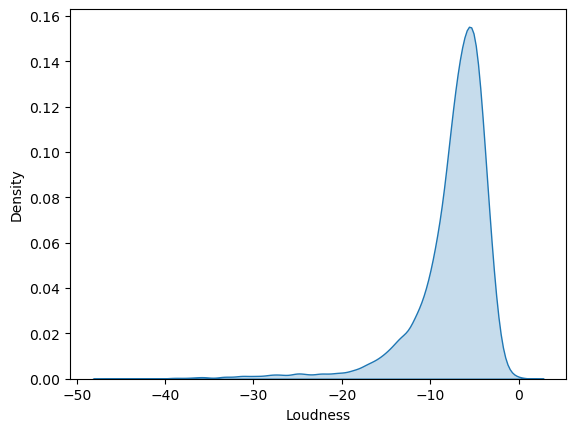

In [14]:
sb.kdeplot(data['Loudness'], shade=True);

<AxesSubplot:xlabel='Speechiness', ylabel='Density'>

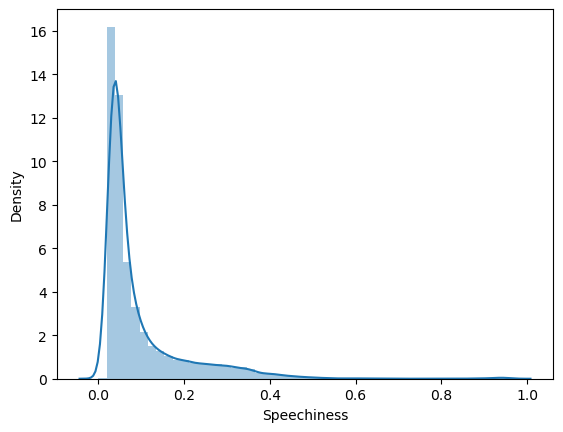

In [15]:
sb.distplot(data['Speechiness'])

<AxesSubplot:xlabel='Energy', ylabel='Density'>

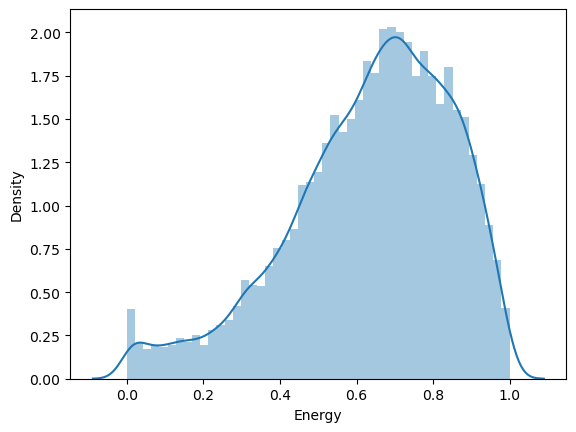

In [16]:
sb.distplot(data['Energy'])

<AxesSubplot:xlabel='Likes', ylabel='Density'>

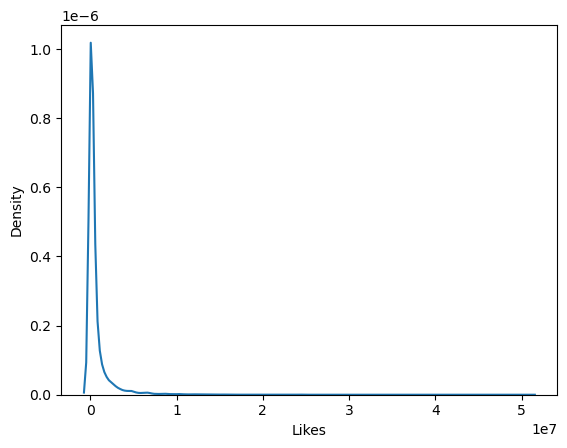

In [17]:
sb.kdeplot(data['Likes'])

In [18]:
data.drop(columns=['Unnamed: 0'],inplace=True)

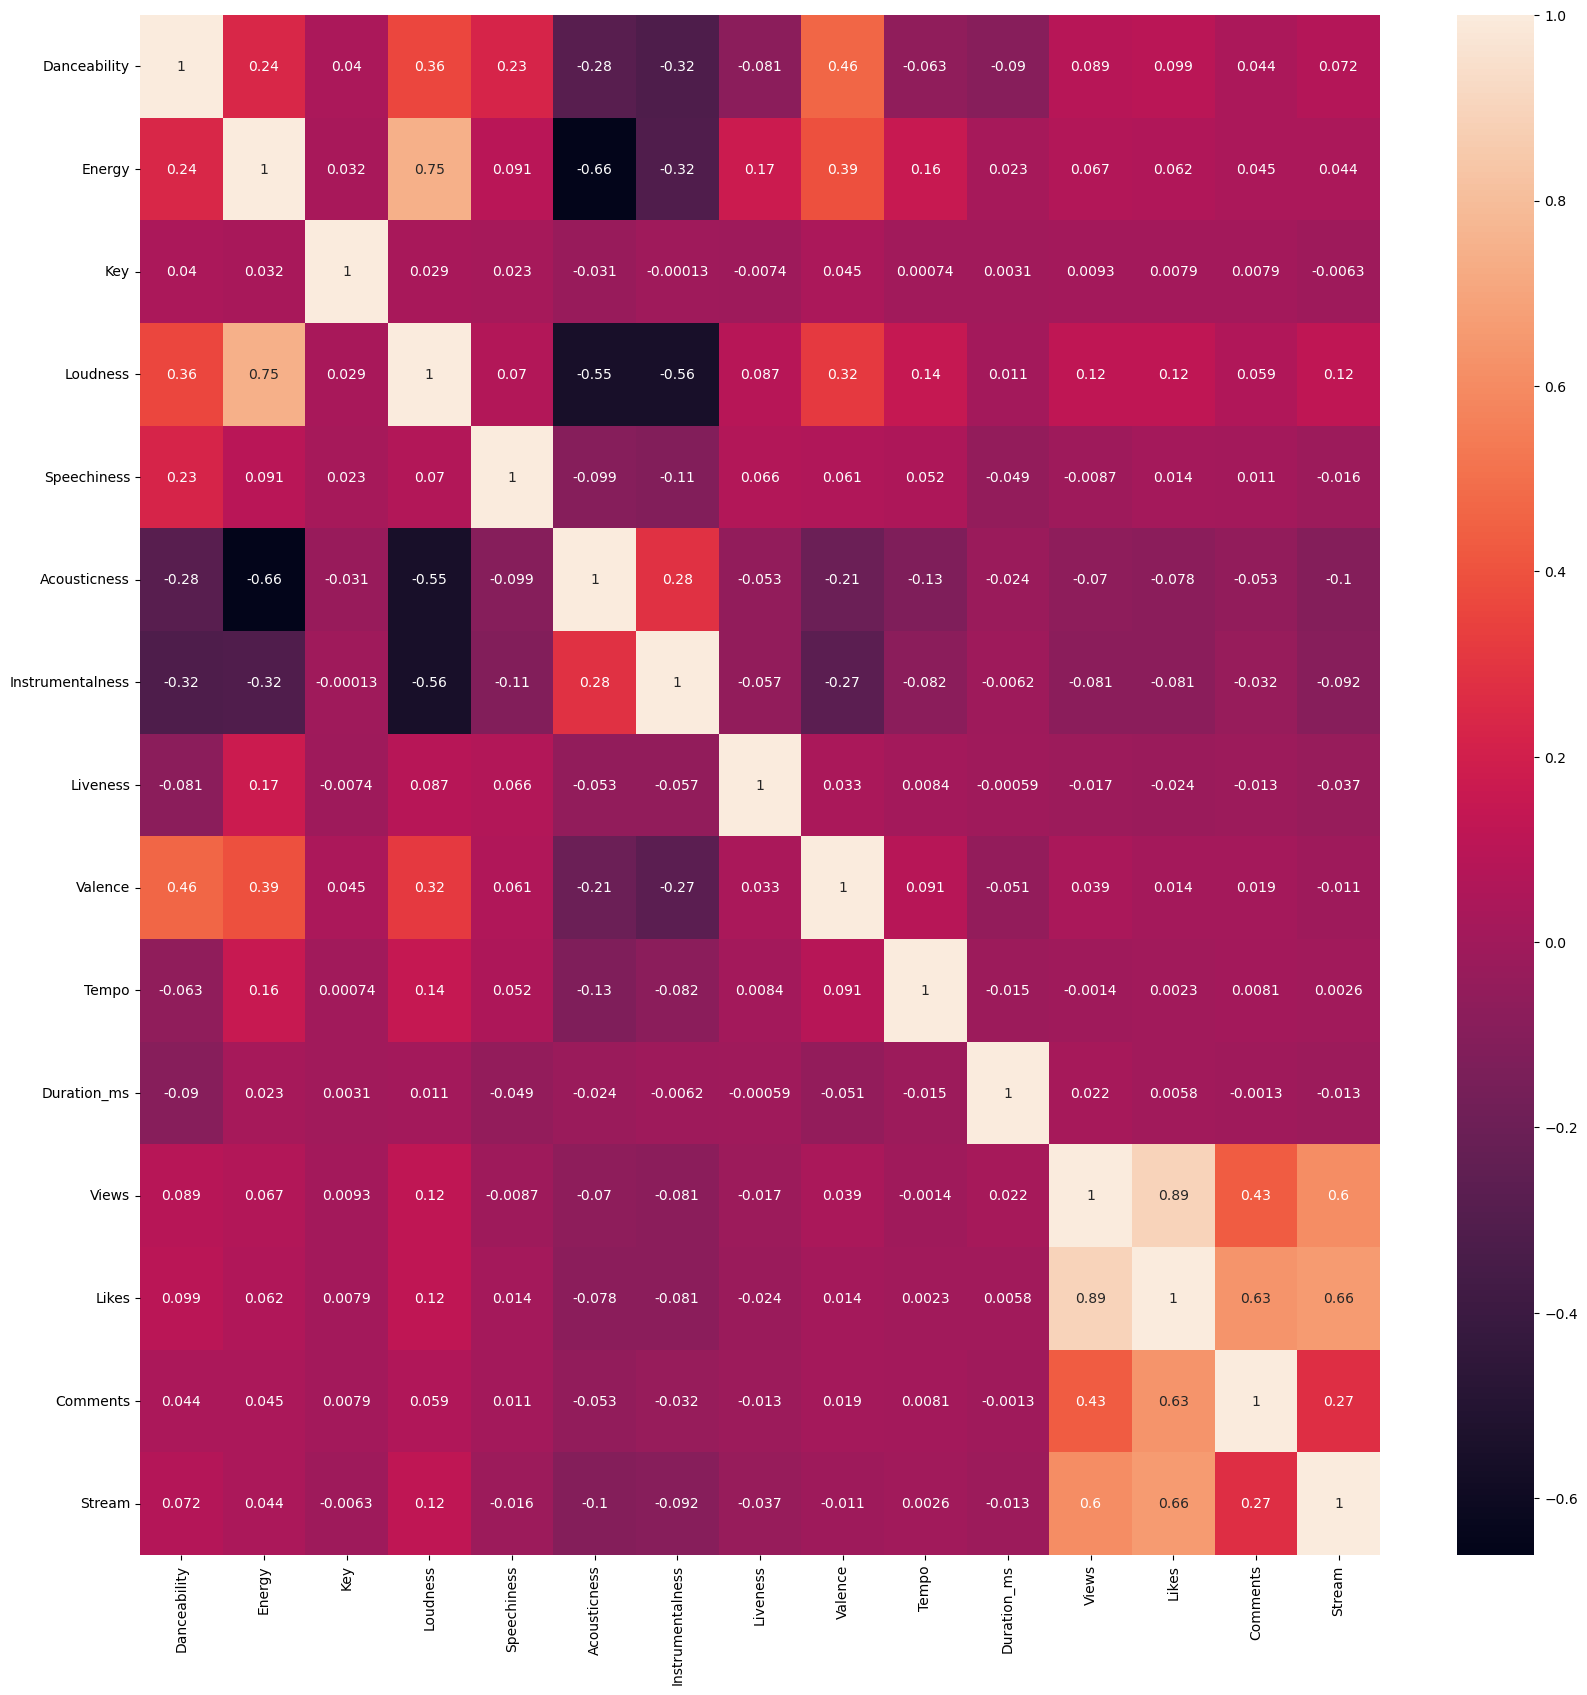

In [20]:
plt.figure(figsize=(20,20))
sb.heatmap(data.corr(),annot=True);

In [21]:
data.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [53]:
top_10cha=data.groupby('Channel')[['Energy','Views','Likes']].sum().sort_values(by='Views',ascending=False).reset_index()
top_10cha.head(10)

,Channel,Energy,Views,Likes
0,T-Series,164.479,4.779864e+10,348793719.0
1,LuisFonsiVEVO,5.318,2.170252e+10,125771154.0
2,CalvinHarrisVEVO,26.502,1.828114e+10,88395807.0
3,Macklemore,16.988,1.700341e+10,112680815.0
4,Ed Sheeran,10.827,1.691822e+10,95650055.0
5,Hear This Music,14.381,1.508851e+10,73271127.0
6,Cocomelon - Nursery Rhymes,4.002,1.460167e+10,41713913.0
7,Bruno Mars,16.103,1.301357e+10,89138194.0
8,KatyPerryVEVO,7.796,1.247680e+10,59551479.0
9,DJSnakeVEVO,11.030,1.245510e+10,108671915.0


In [ ]:
sb.histplot(top_10cha)

In [30]:
albun_type=data.groupby('Album_type')['Views'].sum().reset_index()
albun_type

,Album_type,Views
0,album,1.410484e+12
1,compilation,5.887175e+10
2,single,3.939238e+11


([<matplotlib.patches.Wedge at 0x77810665f4d0>,
 [Text(-0.7947092511789445, 0.7605505940373734, 'album'),
  Text(0.1712302643701151, -1.1877205885913322, 'compilation'),
  Text(0.9449089507386885, -0.7396939061624822, 'single')],
 [Text(-0.4334777733703334, 0.41484577856584, '76%'),
  Text(0.09988432088256714, -0.6928370100116104, '3%'),
  Text(0.5511968879309016, -0.43148811192811454, '21%')])

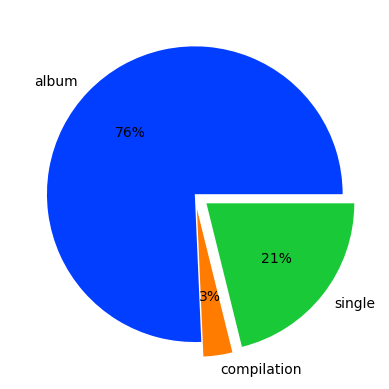

In [42]:
plt.pie(albun_type['Views'],labels=albun_type['Album_type'],autopct='%.0f%%',colors=sb.color_palette('bright'),explode = [0, 0.1, 0.1,])